In [16]:
#Social_Network_Ads.csv

**Importing the libraries**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [18]:
df = pd.read_csv('Social_Network_Ads.csv')

In [19]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:xlabel='Purchased', ylabel='count'>

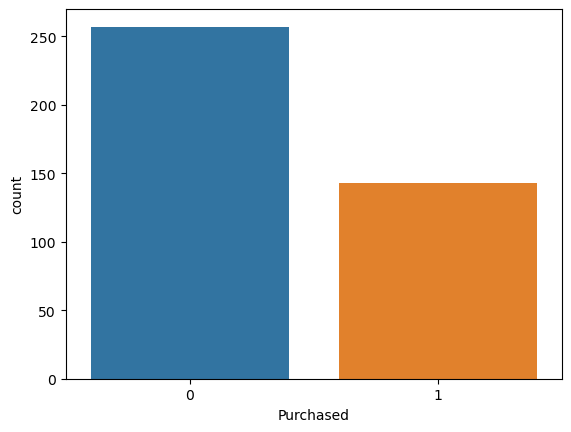

In [20]:
sns.countplot(x = df['Purchased'])

In [21]:
gender_encode = pd.get_dummies(df.Gender)
df = pd.concat([df, gender_encode], axis = 1)
df.drop(['Gender'], axis = 1, inplace = True)

In [26]:
df.head(3)

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0


**Splitting the dataset into the Training set and Test set**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop(['Purchased', 'User ID'], axis = 1)
y = df[['Purchased']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Feature Scaling**

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [30]:
names = X.columns

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [31]:
X_train = pd.DataFrame(X_train, columns = [names])
X_test = pd.DataFrame(X_test, columns = [names])

**Fitting K-NN to the Training set**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier()

In [41]:
knn.fit(X_train, y_train)

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

**Predicting the Test set results**

In [42]:
y_pred = knn.predict(X_test)

**Making the Confusion Matrix**

In [51]:
from sklearn.metrics import (plot_confusion_matrix, confusion_matrix)

In [52]:
 confusion_matrix(y_test,y_pred)

array([[48,  2],
       [ 2, 28]], dtype=int64)

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


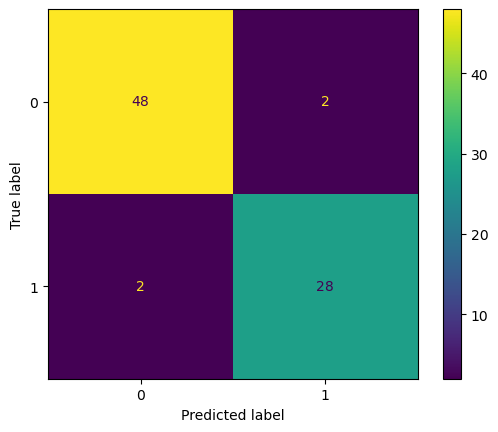

In [50]:
plot_confusion_matrix(knn, X_test, y_test)